In [2]:
#Instalar libreria pandas-datareader  " pip install pandas-datareader" En Anaconda
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree

# 5.1 Leer los datos:
Cargar la base de datos usando la libreria pandas (Python). Considere la ultima columna de
la base de datos como el vector de clases o etiquetas.

HTRU2 Data Set-Description
https://archive.ics.uci.edu/ml/datasets/HTRU2


In [3]:
df_datos = pd.read_csv("HTRU_2.csv",header=None)

In [4]:
df_datos

,0,1,2,3,4,5,6,7,8
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


# Normalizar los datos

StandardScaler

z = (x - u) / s

In [5]:
X = df_datos.values[:,:-1]
# Solo debemos noramlizar las variables en cuestion no la etiqueta del registro por eso no se selecciona la ultima columna

In [6]:
X

array([[140.5625    ,  55.68378214,  -0.23457141, ...,  19.11042633,
          7.97553179,  74.24222492],
       [102.5078125 ,  58.88243001,   0.46531815, ...,  14.86014572,
         10.57648674, 127.3935796 ],
       [103.015625  ,  39.34164944,   0.32332837, ...,  21.74466875,
          7.73582202,  63.17190911],
       ...,
       [119.3359375 ,  59.93593941,   0.1593631 , ...,  58.8720002 ,
          2.49951714,   4.59517265],
       [114.5078125 ,  53.90239966,   0.20116138, ...,  13.38173065,
         10.00796731, 134.2389095 ],
       [ 57.0625    ,  85.79734025,   1.40639105, ...,  64.71256228,
         -1.59752658,   1.42947536]])

In [7]:
# Configurar el normalizador, lo configuramos con los datos
scaler = StandardScaler()
scaler.fit(X)
print(scaler.mean_) #Las medias de las variables luego de ser normalizadas

[111.07996834  46.54953156   0.47785726   1.770279    12.61439966
  26.3265147    8.30355612 104.8577087 ]


In [8]:
X = scaler.transform(X) #Normalizamos todo el dataset

In [9]:
X # Como se ve se normalizo los datos

array([[ 1.14931702,  1.33483164, -0.66956953, ..., -0.37062547,
        -0.07279778, -0.28743812],
       [-0.3341682 ,  1.80226533, -0.01178476, ..., -0.5889241 ,
         0.50442694,  0.21158145],
       [-0.31437216, -1.05332222, -0.14523256, ..., -0.23532816,
        -0.12599609, -0.39137346],
       ...,
       [ 0.3218423 ,  1.95621968, -0.2993338 , ...,  1.67156847,
        -1.28807874, -0.94133005],
       [ 0.13362759,  1.07450972, -0.26005007, ..., -0.66485697,
         0.37825656,  0.27584987],
       [-2.10576204,  5.73546965,  0.87267394, ...,  1.97154554,
        -2.19732744, -0.97105168]])

# 5.2. Dividir datos :
Usar la funcion train test split para separar 70% como datos de entrenamiento y 30% como
datos de validacion y prueba.

In [10]:
#Considere la ultima columna de la base de datos como el vector de clases o etiquetas.
Y = df_datos.values[:,-1]
print(Y)
print("Original",X.shape)

X_train, X_test, y_train, y_test  = train_test_split(X,Y, train_size  = 0.70)


print("Ejemplos usados para entrenar: ", X_train.shape)
print("Ejemplos usados para test: ", X_test.shape)



[0. 0. 0. ... 0. 0. 0.]
Original (17898, 8)
Ejemplos usados para entrenar:  (12528, 8)
Ejemplos usados para test:  (5370, 8)


# 5.3. Configurar y entrenar el modelo:
A partir de lo anterior, utilice los datos de entrenamiento para crear el modelo de clasicacion
(puede utilizar cualquier algoritmo de clasificacion de la libreria scikit-learn).


# C-Support Vector Classification.

In [11]:
modelo = svm.SVC(kernel ="rbf",verbose=True)
modelo.fit(X_train,y_train)

[LibSVM]

SVC(verbose=True)

###  Evaluar el modelo:
Una vez creado el modelo, utilice los datos de prueba para validar el desempe~no del modelo.
Se recomienda investigar diferentes metricas para analizar el desempeño del modelo.

In [12]:
y_pred = modelo.predict(X_test)

## Metricas de desempeño
###  Accuracy

In [13]:
accuracy = modelo.score(X_test,y_test)
print(accuracy) #Acurracy, Exacto es el modelo 

0.9774674115456239


### Confusion Matrix

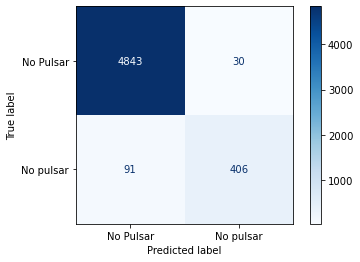

In [14]:
disp = plot_confusion_matrix(modelo, X_test, y_test,
                                 display_labels=["No Pulsar","No pulsar"],
                                 cmap=plt.cm.Blues,
                                 normalize=None)

### Confusion Matrix Normalize

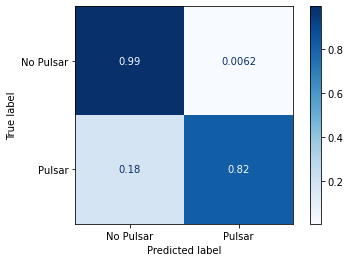

In [15]:
disp = plot_confusion_matrix(modelo, X_test, y_test,
                                 display_labels=["No Pulsar","Pulsar"],
                                 cmap=plt.cm.Blues,
                                 normalize="true")

## DecisionTreeClassifier

In [16]:
modelo = tree.DecisionTreeClassifier()
modelo.fit(X_train,y_train)

DecisionTreeClassifier()

###  Evaluar el modelo:

In [17]:
y_pred = modelo.predict(X_test)

## Metricas de desempeño
###  Accuracy

In [18]:
accuracy = modelo.score(X_test,y_test)
print(accuracy) #Acurracy, Exacto es el modelo 

0.9670391061452513


### Confusion Matrix

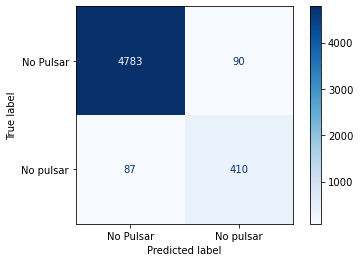

In [19]:
disp = plot_confusion_matrix(modelo, X_test, y_test,
                                 display_labels=["No Pulsar","No pulsar"],
                                 cmap=plt.cm.Blues,
                                 normalize=None)

### Confusion Matrix Normalize

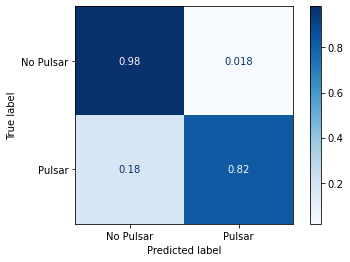

In [20]:
disp = plot_confusion_matrix(modelo, X_test, y_test,
                                 display_labels=["No Pulsar","Pulsar"],
                                 cmap=plt.cm.Blues,
                                 normalize="true")

### Comparacion y conclusion de los resultados de la simulacion

Luego de utilizar el C-Support Vector y Decision Tree Classifier para crear los modelos de clasificacion con sus parametros de por defecto y al entrenar este,utilizamos Accuracy(Precisión) como metrica para analizar el desempeño global, obtenemos un porcentaje de exactitud del 97% para la C-Support Vector Classification y 96% para el Decision Tree Classifier , a simple vista podríamos decir que la maquina de soporte es mejor modelo, sin embargo usar una sola metrica no es suficiente para escoger un modelo y mas en un problema de clasificación, por lo tanto usamos la matriz de confusión para evaluar la precisión de la clasificación por clases. Luego de observar la matriz de confusuión identificamos que el modelo de Decision Tree Classifier tiene mejores resultados clasificando la clase de interes(pulsares) con un 80% mientras que la Maquina de soporte clasifica correctamente solo el 78%, esto es una prueba mas de que usar solo una metrica para seleccionar un modelo es erroneo, si se fuera escoger un modelo seria el Decision Tree Classifier ya que su desempeño es mejor con la clase de interes(1).

Un 80% no es un muy dado los resultado encontrados en el estado del arte, por lo anterior podemos concluir es necesario hacer ajuste en los valores de los parametros o las condiciones del modelo.